# Muneeb Ali
## Customer Segmentation and Sales Analysis:

## Data Cleaning:
- Handle any missing values in the dataset.
- Standardize the date format for consistency.
- Remove any duplicate records to ensure data accuracy.


- Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('sales_data.csv' , encoding = 'UTF-8')

In [6]:
df.head(5)

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85
3,5f3f88e8-b638-4cfd-9af8-e14b63d9082f,12af190c-f3a3-4209-b7a7-fa7a66337df8,2023-02-12,b767b606-a5c1-46fc-83fa-78de163b8fce,Watch,Clothing,4,11.74,North,46.96
4,2029cf6c-dd8e-430c-ae24-586d3a5f422a,d283a232-0b04-49e9-bad3-6dcfd115b421,2023-02-17,15baeab4-63b9-4b98-a52f-40697bcd0c0f,Watch,Accessories,4,387.85,East,1551.40


- Dataset has 363 Rows and 10 Columns

In [8]:
df.shape 

(363, 10)

- There is no Null Values in Dataset

In [10]:
df.info()  #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   363 non-null    object 
 1   Order ID      363 non-null    object 
 2   Order Date    363 non-null    object 
 3   Product ID    363 non-null    object 
 4   Product Name  363 non-null    object 
 5   Category      363 non-null    object 
 6   Quantity      363 non-null    int64  
 7   Unit Price    363 non-null    float64
 8   Region        363 non-null    object 
 9   Total Amount  363 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.5+ KB


- Standardize to 'YYYY-MM-DD'

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date']) 

In [13]:
df['Order Date']

0     2021-12-25
1     2022-10-08
2     2022-11-30
3     2023-02-12
4     2023-02-17
         ...    
358   2023-02-03
359   2021-11-07
360   2022-02-01
361   2023-02-16
362   2022-03-15
Name: Order Date, Length: 363, dtype: datetime64[ns]

- Columns names

In [15]:
df.columns

Index(['Customer ID', 'Order ID', 'Order Date', 'Product ID', 'Product Name',
       'Category', 'Quantity', 'Unit Price', 'Region', 'Total Amount'],
      dtype='object')

- No dublicate values in Dataset

In [17]:
df.duplicated().sum() #no dublicates in dataset in any column

0

In [18]:
df.head()

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85
3,5f3f88e8-b638-4cfd-9af8-e14b63d9082f,12af190c-f3a3-4209-b7a7-fa7a66337df8,2023-02-12,b767b606-a5c1-46fc-83fa-78de163b8fce,Watch,Clothing,4,11.74,North,46.96
4,2029cf6c-dd8e-430c-ae24-586d3a5f422a,d283a232-0b04-49e9-bad3-6dcfd115b421,2023-02-17,15baeab4-63b9-4b98-a52f-40697bcd0c0f,Watch,Accessories,4,387.85,East,1551.40


## Customer Segmentation And Analysis:
- Use RFM (Recency, Frequency, Monetary) analysis to segment customers into different groups based on their purchasing behavior.

- Identify key customer segments such as "High-Value Customers," "At-Risk Customers," and "New Customers."

- RFM analysis is a marketing technique used to evaluate customer value based on three key metrics:

Recency (R): How recently a customer made a purchase. More recent purchases indicate higher engagement.

Frequency (F): How often a customer makes purchases. Frequent buyers are often more loyal.

Monetary (M): How much money a customer spends. Higher spenders are typically more valuable.

By analyzing these metrics, businesses can segment customers, tailor marketing efforts, and improve targeting strategies to boost customer retention and sales.

- Recency -> This measures how recently a customer has made a purchase.
- Frequency -> This measures how often a customer makes a purchase over a given period.
- Monetary -> This measures how much money a customer has spent over a given period.

In [22]:
df.columns

Index(['Customer ID', 'Order ID', 'Order Date', 'Product ID', 'Product Name',
       'Category', 'Quantity', 'Unit Price', 'Region', 'Total Amount'],
      dtype='object')

In [23]:
df['Year'] = df['Order Date'].dt.year
recent_year = df['Year'].max()

#### Recency:
- Group By Customer: Groups the data by Customer ID to find the most recent order date for each customer.

- Compute Recency: Calculates the number of days since the most recent purchase for each customer, using current_date.

- Format Data: Prepares a DataFrame with Customer ID and their corresponding Recency.

In [25]:
# Define the current date
current_date = df['Order Date'].max() + pd.DateOffset(days=1)

# Calculate Recency
recency = df.groupby('Customer ID')['Order Date'].max().reset_index()
recency['Recency'] = (current_date - recency['Order Date']).dt.days
recency = recency[['Customer ID', 'Recency']]
recency

,Customer ID,Recency
0,005612ec-5aea-48d6-9a6d-cdf0f538f4da,443
1,01329251-44d2-4ed4-b3cb-0d6b13a4712f,185
2,015cda0c-7c05-45ab-8438-ac338a7db94c,512
3,018c6e2c-9c84-45e1-991b-9310c5e174a5,255
4,02167aaa-8387-4e7e-b1fe-30c87b9a52ed,387
...,...,...
358,fd5a88d2-584d-42fb-9ab9-08cf53a511ad,578
359,fd7d850c-3b09-4df0-b68f-71faec768636,264
360,fe2e53a6-1073-48d5-b22b-68e75653efb4,107
361,fed141ce-2d8b-4be3-b88c-34c2f858b37f,222


#### Frequency:
- Group By Customer: Groups the dataset by Customer ID and counts the number of orders (Order ID) each customer has made.

- Format Data:

-Count Orders: Uses .count() to count the number of orders for each customer.

-Reset Index: Converts the grouped data back into a DataFrame with reset_index().

-Rename Columns: Renames the columns to Customer ID and Frequency for clarity.

In [27]:
frequency = df.groupby('Customer ID')['Order ID'].count().reset_index()
frequency.columns = ['Customer ID', 'Frequency']
frequency

,Customer ID,Frequency
0,005612ec-5aea-48d6-9a6d-cdf0f538f4da,1
1,01329251-44d2-4ed4-b3cb-0d6b13a4712f,1
2,015cda0c-7c05-45ab-8438-ac338a7db94c,1
3,018c6e2c-9c84-45e1-991b-9310c5e174a5,1
4,02167aaa-8387-4e7e-b1fe-30c87b9a52ed,1
...,...,...
358,fd5a88d2-584d-42fb-9ab9-08cf53a511ad,1
359,fd7d850c-3b09-4df0-b68f-71faec768636,1
360,fe2e53a6-1073-48d5-b22b-68e75653efb4,1
361,fed141ce-2d8b-4be3-b88c-34c2f858b37f,1


### Monetory:
- Group By Customer: Groups the dataset by Customer ID and sums the Total Amount of orders for each customer.

- Format Data:

-Sum Purchases: Uses .sum() to aggregate the total spending for each customer.

-Reset Index: Converts the grouped data back into a DataFrame with reset_index().

-Rename Columns: Renames the columns to Customer ID and Monetary to clearly indicate the total spending for each customer.

In [29]:
monetary = df.groupby('Customer ID')['Total Amount'].sum().reset_index()
monetary.columns = ['Customer ID', 'Monetary']
monetary

,Customer ID,Monetary
0,005612ec-5aea-48d6-9a6d-cdf0f538f4da,720.52
1,01329251-44d2-4ed4-b3cb-0d6b13a4712f,3356.50
2,015cda0c-7c05-45ab-8438-ac338a7db94c,1641.24
3,018c6e2c-9c84-45e1-991b-9310c5e174a5,2746.70
4,02167aaa-8387-4e7e-b1fe-30c87b9a52ed,2010.51
...,...,...
358,fd5a88d2-584d-42fb-9ab9-08cf53a511ad,3358.80
359,fd7d850c-3b09-4df0-b68f-71faec768636,2821.38
360,fe2e53a6-1073-48d5-b22b-68e75653efb4,373.56
361,fed141ce-2d8b-4be3-b88c-34c2f858b37f,3077.01


### Customer segmentation:
- New Customers: Customers who have made a purchase recently.
- High-Value Customers: Customers who have spent a substantial amount and place orders consistently.
- At-Risk Customers: Customers who made purchases in the past but have not ordered recently.

#### For New Customer:

In [32]:
new_customers = df[df['Year'] == recent_year]['Customer ID'].unique()

#### For High Value Customers

In [34]:
# Calculate total amount spent and number of purchases manually
total_amount = {}
purchase_count = {}

for _, row in df.iterrows():
    customer_id = row['Customer ID']
    if customer_id not in total_amount:
        total_amount[customer_id] = 0
        purchase_count[customer_id] = 0
    
    total_amount[customer_id] += row['Total Amount']
    purchase_count[customer_id] += 1

# Convert to DataFrame
customer_summary = pd.DataFrame({
    'Customer ID': list(total_amount.keys()),
    'total_amount': list(total_amount.values()),
    'purchase_count': list(purchase_count.values())
})

# Define high-value criteria
high_value_threshold_amount = customer_summary['total_amount'].quantile(0.75)
high_value_customers = customer_summary[
    (customer_summary['total_amount'] > high_value_threshold_amount) |
    (customer_summary['purchase_count'] > 1)
]['Customer ID'].unique()

#### For At Risk Customers

In [36]:
# Find customers who made purchases in earlier years
earlier_year_customers = df[df['Year'] < recent_year]['Customer ID'].unique()

# Exclude customers who purchased in the most recent year
at_risk_customers = [customer for customer in earlier_year_customers if customer not in new_customers]

#### Creating a DataFrame for customer segmentation

In [119]:
# Create a DataFrame for customer segmentation
segments = pd.DataFrame({
    'Customer ID': df['Customer ID'].unique()
})

# Assign segments based on the criteria
segments['Segment'] = segments['Customer ID'].apply(
    lambda x: 'New Customer' if x in new_customers else (
        'High-Value Customer' if x in high_value_customers else (
            'At-Risk Customer' if x in at_risk_customers else 'Other'
        )
    )
)

# Merge segments with the original data if needed
df_segmented = df.merge(segments, on='Customer ID')

# Calculate the count of each segment
segment_counts = df_segmented['Segment'].value_counts()

# Calculate the percentage for each segment
segment_percentages = (segment_counts / segment_counts.sum()) * 100

# Create a DataFrame to display the results
segment_summary = pd.DataFrame({
    'Count': segment_counts,
    'Percentage': segment_percentages
})

# Display the result
segment_summary

,Count,Percentage
Segment,,
At-Risk Customer,187,51.515152
New Customer,113,31.129477
High-Value Customer,63,17.355372


In [121]:
df_segmented

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount,Year,Month,Segment
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46,2021,2021-12,At-Risk Customer
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55,2022,2022-10,At-Risk Customer
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85,2022,2022-11,At-Risk Customer
3,5f3f88e8-b638-4cfd-9af8-e14b63d9082f,12af190c-f3a3-4209-b7a7-fa7a66337df8,2023-02-12,b767b606-a5c1-46fc-83fa-78de163b8fce,Watch,Clothing,4,11.74,North,46.96,2023,2023-02,New Customer
4,2029cf6c-dd8e-430c-ae24-586d3a5f422a,d283a232-0b04-49e9-bad3-6dcfd115b421,2023-02-17,15baeab4-63b9-4b98-a52f-40697bcd0c0f,Watch,Accessories,4,387.85,East,1551.40,2023,2023-02,New Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0b0a82bf-f4ed-4c33-b6bf-6abcac6aa713,327333eb-9fde-495b-be58-a0b554e16ea2,2023-02-03,28fd5c74-2392-4938-b2e8-a76a4a4c8f4b,Book,Electronics,5,250.53,East,1252.65,2023,2023-02,New Customer
359,eb94cd48-0610-449f-9002-58bae9c1816b,5f3345e0-aa9a-4913-8b37-38ca87e29124,2021-11-07,767bbb9c-bb9e-4eb4-8efa-42bd859741b5,Headphones,Clothing,9,437.63,East,3938.67,2021,2021-11,High-Value Customer
360,83d258bf-5c94-4bc6-8994-2b4e663a6e39,142c7c19-4bd4-4000-bd8d-e24324f05f1d,2022-02-01,b060a19c-f91b-4f83-b73a-b8db73965840,TV,Electronics,8,291.29,North,2330.32,2022,2022-02,High-Value Customer
361,93e1ea48-e5d3-4934-93ed-9f2f99234299,8bf578b5-1ffe-44a1-b275-0b3ac932b3cf,2023-02-16,20b798fe-12e4-4fc1-8d00-83084dd0116b,Blender,Accessories,5,240.00,West,1200.00,2023,2023-02,New Customer


- Filtering the DataFrame for "At-Risk Customers"

In [40]:
at_risk_customers_df = df_segmented[df_segmented['Segment'] == 'At-Risk Customer']
at_risk_customers_df

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount,Year,Segment
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46,2021,At-Risk Customer
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55,2022,At-Risk Customer
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85,2022,At-Risk Customer
5,46b3b1a0-9a5c-4994-9295-ac9eb78d13eb,11d121ed-bc97-46e3-a950-13496cc0b80f,2022-02-16,0951322d-e341-4ce0-bc31-5e9a171ed63d,Shoes,Home & Kitchen,3,322.19,North,966.57,2022,At-Risk Customer
6,76c5d7e3-f3e0-428a-bcae-e8f86d7c5688,25ddf1e2-dc7d-490a-a776-e219266488df,2021-10-25,27f768f8-bca7-4455-a3c7-597107e76c8d,Watch,Clothing,2,138.36,North,276.72,2021,At-Risk Customer
...,...,...,...,...,...,...,...,...,...,...,...,...
352,3325f616-d5c3-4af0-bced-28bf55a60ab5,43f3449c-b106-4779-8632-f511853a8ccf,2021-09-10,fede7018-d11f-49dc-a233-ac48bceb784d,T-shirt,Home & Kitchen,5,144.41,North,722.05,2021,At-Risk Customer
355,8e37dbff-4fea-46eb-b5f5-1b18bc2b89aa,4a8c2b5b-0348-40a0-a513-6a937493ad46,2022-11-04,667cbd80-11b7-418b-bc5c-4bcd70f5f45b,Headphones,Electronics,4,351.73,East,1406.92,2022,At-Risk Customer
356,1dcc9200-bef9-4dbc-b280-29692f70ae8d,a9240ee1-85f5-4077-8554-62b163c940ee,2022-07-28,c168f80e-546f-45c8-9c55-a19622e71287,Laptop,Books,6,71.88,East,431.28,2022,At-Risk Customer
357,ed9e9ece-1c6e-44df-9c02-bf70f39902ab,135ce148-01b0-48af-8372-f45fd4e518a4,2022-01-04,2ca539e7-6bb7-4ad0-8132-73a34c6346af,TV,Home & Kitchen,4,435.55,South,1742.20,2022,At-Risk Customer


- Filter the DataFrame for "New Customers"

In [42]:
new_customers_df = df_segmented[df_segmented['Segment'] == 'New Customer']
new_customers_df

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount,Year,Segment
3,5f3f88e8-b638-4cfd-9af8-e14b63d9082f,12af190c-f3a3-4209-b7a7-fa7a66337df8,2023-02-12,b767b606-a5c1-46fc-83fa-78de163b8fce,Watch,Clothing,4,11.74,North,46.96,2023,New Customer
4,2029cf6c-dd8e-430c-ae24-586d3a5f422a,d283a232-0b04-49e9-bad3-6dcfd115b421,2023-02-17,15baeab4-63b9-4b98-a52f-40697bcd0c0f,Watch,Accessories,4,387.85,East,1551.40,2023,New Customer
10,662cade7-bc25-40c8-a74d-19b1d4f85bf5,136dd32c-1a27-42ad-a3dd-416684653f70,2023-05-22,b4fe1cf0-2b3e-4eda-a238-0d1295c37138,Smartphone,Books,7,14.74,South,103.18,2023,New Customer
12,9382697c-6ec0-4238-90a1-fa2161e5130d,457350dc-82f2-4190-babc-00f3d48cedc3,2023-07-21,88428f8c-5903-42cf-a8e1-d1741566fb78,Book,Electronics,1,442.72,East,442.72,2023,New Customer
13,b20a918f-8c70-4d28-8951-2e013f63eef3,1ed11aab-94fe-4d91-862c-e270be0c4b92,2023-07-19,cbd839c5-521d-4da5-853c-263552186094,Smartphone,Books,2,452.93,West,905.86,2023,New Customer
...,...,...,...,...,...,...,...,...,...,...,...,...
345,d9195a2a-5cd0-41b8-9fda-fc89e8017bf9,8bba0530-7818-43be-aa74-3bc13ebda10c,2023-07-05,e09ae61e-d84e-4035-abfa-ec44f79f6ee7,Watch,Electronics,2,148.67,North,297.34,2023,New Customer
347,2f7be31f-843b-4e79-8687-3e98c66af4b0,b3ad39ff-3bbc-4436-9a29-a0991ce3cf4c,2023-04-17,a89e0c20-81b0-4f4f-b23a-f519dd05c6e7,Shoes,Clothing,5,105.12,North,525.60,2023,New Customer
354,70223bc1-5bc4-4719-87b7-4e86b9bbe7e4,f403ecd4-b15a-4af9-8d7a-05bee258b714,2023-03-04,c9e971c4-fbc9-4b18-aee8-1bddefd1f972,T-shirt,Books,10,281.15,East,2811.50,2023,New Customer
358,0b0a82bf-f4ed-4c33-b6bf-6abcac6aa713,327333eb-9fde-495b-be58-a0b554e16ea2,2023-02-03,28fd5c74-2392-4938-b2e8-a76a4a4c8f4b,Book,Electronics,5,250.53,East,1252.65,2023,New Customer


- Filtering the DataFrame for "High-Value Customers"

In [44]:
high_value_customers_df = df_segmented[df_segmented['Segment'] == 'High-Value Customer']
high_value_customers_df

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount,Year,Segment
7,fd5a88d2-584d-42fb-9ab9-08cf53a511ad,8c0abda8-7fd8-4015-8cd0-dad8734cbb6b,2022-01-19,82b2ddc4-e060-4519-a9c1-d79691de65b4,T-shirt,Clothing,9,373.20,East,3358.80,2022,High-Value Customer
9,9b663313-85c6-4379-8b0b-13d3980fd2b8,6e6791ce-d56a-40a9-a9b7-189e31567454,2021-08-21,86d5c818-9899-4018-9e9b-36f56c61da20,Headphones,Electronics,10,219.57,North,2195.70,2021,High-Value Customer
16,f055f53b-c802-4341-bb84-768c35b64a36,a9f92679-3011-46e9-8d03-4fcc32d0bc7b,2022-08-02,75d1617c-7fd5-42f5-879a-1911f6b8834c,Microwave,Electronics,9,295.43,North,2658.87,2022,High-Value Customer
34,449c6ff4-766d-4017-aa16-84da3c9acefb,55d16d55-2a0c-474e-98f9-6ef8b0fdbbc1,2022-08-22,5d77c9e4-ee67-445f-b1c3-307e68774a42,Blender,Home & Kitchen,6,488.34,East,2930.04,2022,High-Value Customer
41,8a4719f8-2448-4671-a0c4-f0b2ed9d9460,2e5c85ea-b4ae-4fac-87a0-6f72a21a2918,2022-12-12,385ca871-9392-4616-8042-f76151d71353,Microwave,Electronics,10,403.10,West,4031.00,2022,High-Value Customer
...,...,...,...,...,...,...,...,...,...,...,...,...
338,c9cecd58-8abd-4039-ba2b-c7073ac5e081,b6c7f793-85a0-4440-b9a6-ec50f654f470,2021-08-24,06ba5653-8542-40e5-9b10-d3b7baa7eae1,T-shirt,Home & Kitchen,9,383.47,South,3451.23,2021,High-Value Customer
341,8394dcf1-a06f-435a-be1d-be0b18c78713,81bb90e8-c5e9-4a1f-a4e1-b4eb36c4b739,2022-01-21,f7dda20c-ebc9-4a19-8ed5-2009cf14e482,Shoes,Books,9,247.26,South,2225.34,2022,High-Value Customer
353,83d8a0a5-485c-4971-921c-47446da985b2,ece11ec5-d3c3-4cc1-ac3e-471f753a15d6,2022-01-25,1c4712ef-e519-44ce-9d3b-15f18199ff62,Laptop,Clothing,5,487.40,East,2437.00,2022,High-Value Customer
359,eb94cd48-0610-449f-9002-58bae9c1816b,5f3345e0-aa9a-4913-8b37-38ca87e29124,2021-11-07,767bbb9c-bb9e-4eb4-8efa-42bd859741b5,Headphones,Clothing,9,437.63,East,3938.67,2021,High-Value Customer


### Visualization of the Customer Segmentation in Bar Graph

Segment
At-Risk Customer       187
New Customer           113
High-Value Customer     63
Name: count, dtype: int64


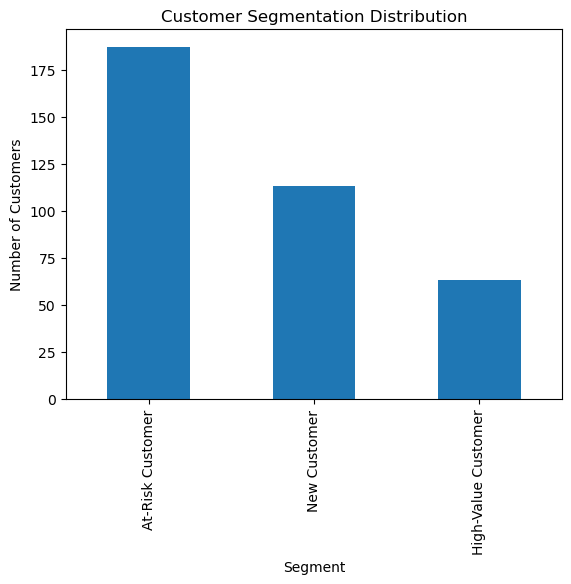

In [46]:
# Count the number of customers in each segment
segment_counts = segments['Segment'].value_counts()

# Print or plot the distribution
print(segment_counts)
segment_counts.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Distribution')
plt.show()

### Sales Trend Analysis:
- Analyze monthly and yearly sales trends.
- Determine which product categories are performing best.
- Identify the regions with the highest sales.


In [48]:
df['Month'] = df['Order Date'].dt.to_period(freq='M')

#### Calculating Monthly Sales Trends

In [50]:
df['Order Date']

0     2021-12-25
1     2022-10-08
2     2022-11-30
3     2023-02-12
4     2023-02-17
         ...    
358   2023-02-03
359   2021-11-07
360   2022-02-01
361   2023-02-16
362   2022-03-15
Name: Order Date, Length: 363, dtype: datetime64[ns]

In [51]:
df['Year']

0      2021
1      2022
2      2022
3      2023
4      2023
       ... 
358    2023
359    2021
360    2022
361    2023
362    2022
Name: Year, Length: 363, dtype: int32

In [52]:
df['Month']

0      2021-12
1      2022-10
2      2022-11
3      2023-02
4      2023-02
        ...   
358    2023-02
359    2021-11
360    2022-02
361    2023-02
362    2022-03
Name: Month, Length: 363, dtype: period[M]

In [53]:
# Calculate monthly sales
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

# Rename columns for clarity
monthly_sales.columns = ['Month', 'Total Sales']

# Display the monthly sales trends
monthly_sales

,Month,Total Sales
0,2021-08,17021.38
1,2021-09,19482.53
2,2021-10,24312.71
3,2021-11,28496.76
4,2021-12,15959.63
5,2022-01,24656.45
6,2022-02,8925.77
7,2022-03,17441.87
8,2022-04,17428.87
9,2022-05,16781.01


#### Calculating Year Sales Trends

In [55]:
# Calculate yearly sales
yearly_sales = df.groupby('Year')['Total Amount'].sum().reset_index()

# Rename columns for clarity
yearly_sales.columns = ['Year', 'Total Sales']

# Display the yearly sales trends
yearly_sales


,Year,Total Sales
0,2021,105273.01
1,2022,236292.16
2,2023,149733.33


### Visualization of the Monthly and Yearly Sales in Line Graph

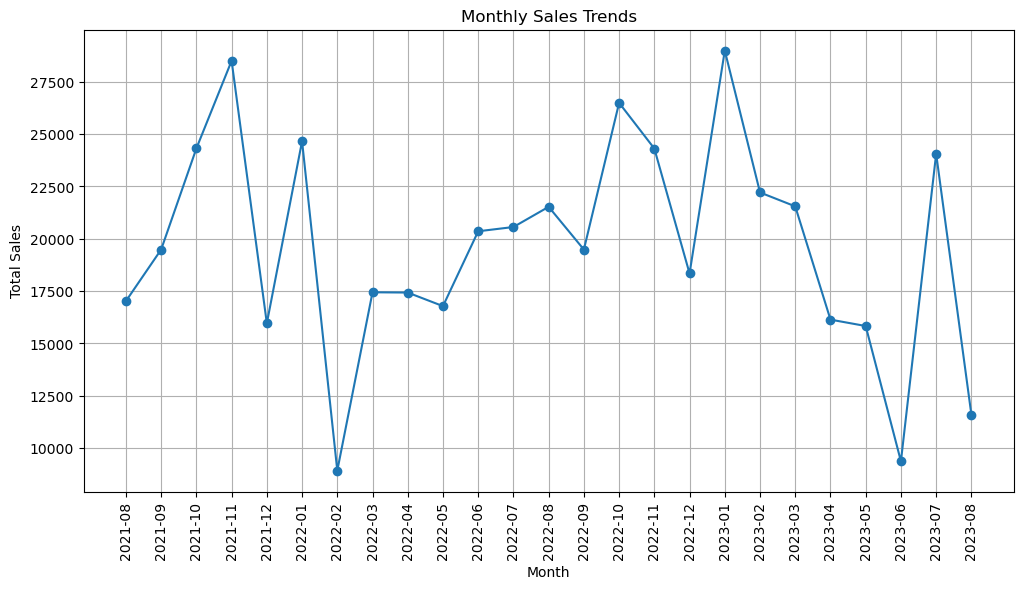

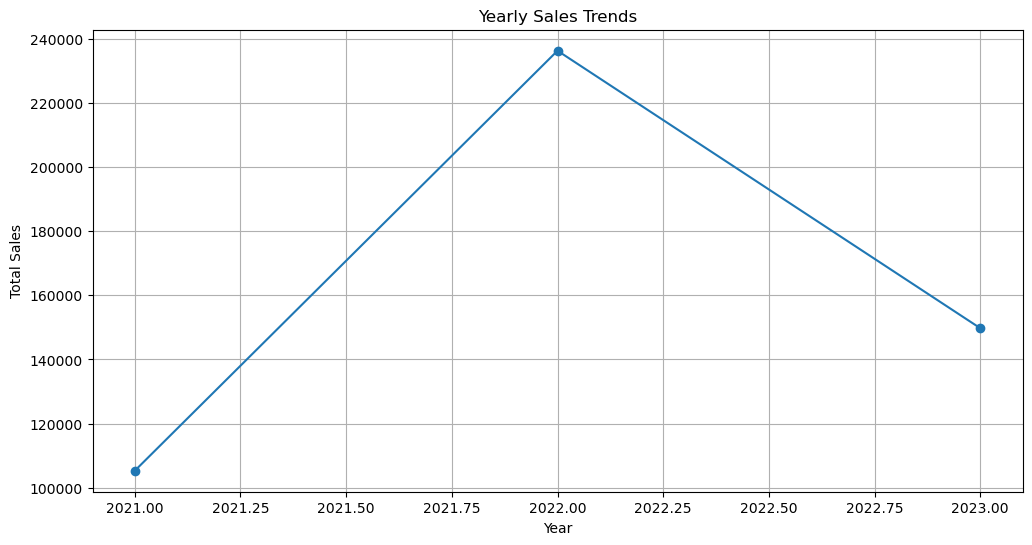

In [57]:
# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot yearly sales trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trends')
plt.grid(True)
plt.show()

#### Determining which product categories are performing best

In [59]:
df.columns

Index(['Customer ID', 'Order ID', 'Order Date', 'Product ID', 'Product Name',
       'Category', 'Quantity', 'Unit Price', 'Region', 'Total Amount', 'Year',
       'Month'],
      dtype='object')

In [60]:
df.head()

,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount,Year,Month
0,8a80ddb1-8615-4452-adce-db56c9385365,d929f0c8-5600-456b-9360-ae114e339871,2021-12-25,9c485900-229d-4b96-ac99-374754d40e1c,T-shirt,Accessories,2,55.23,North,110.46,2021,2021-12
1,ac664d43-893a-47a1-bdd7-139f73a360a7,38d57142-b1f3-4b25-ae2e-e7404d2df736,2022-10-08,3ff68652-ba71-4610-9284-71f778fd2819,Smartphone,Clothing,1,217.55,South,217.55,2022,2022-10
2,ebbc4ba3-d24f-4e25-a585-15c8e6bacbd7,58a7f2a2-5682-4510-b94e-cb56d076880d,2022-11-30,99ad1f2f-fa2e-4b27-8952-7b23249eeebc,T-shirt,Books,5,145.57,West,727.85,2022,2022-11
3,5f3f88e8-b638-4cfd-9af8-e14b63d9082f,12af190c-f3a3-4209-b7a7-fa7a66337df8,2023-02-12,b767b606-a5c1-46fc-83fa-78de163b8fce,Watch,Clothing,4,11.74,North,46.96,2023,2023-02
4,2029cf6c-dd8e-430c-ae24-586d3a5f422a,d283a232-0b04-49e9-bad3-6dcfd115b421,2023-02-17,15baeab4-63b9-4b98-a52f-40697bcd0c0f,Watch,Accessories,4,387.85,East,1551.40,2023,2023-02


- Calculating total sales by category

In [62]:
# Groupby according to category
category_sales = df.groupby('Category')['Total Amount'].sum().reset_index()

In [125]:
# Renaming columns for clarity
category_sales.columns = ['Category', 'Total Sales']
category_sales

In [64]:
# Sorting categories by total sales in descending order
category_sales = category_sales.sort_values(by='Total Sales', ascending=False)
category_sales

,Category,Total Sales
1,Books,115120.41
3,Electronics,101544.99
2,Clothing,94677.73
4,Home & Kitchen,92568.42
0,Accessories,87386.95


- Sales According to Category

In [66]:
category_sales

,Category,Total Sales
1,Books,115120.41
3,Electronics,101544.99
2,Clothing,94677.73
4,Home & Kitchen,92568.42
0,Accessories,87386.95


### Visualization of the Sales according to category in Bar Graph

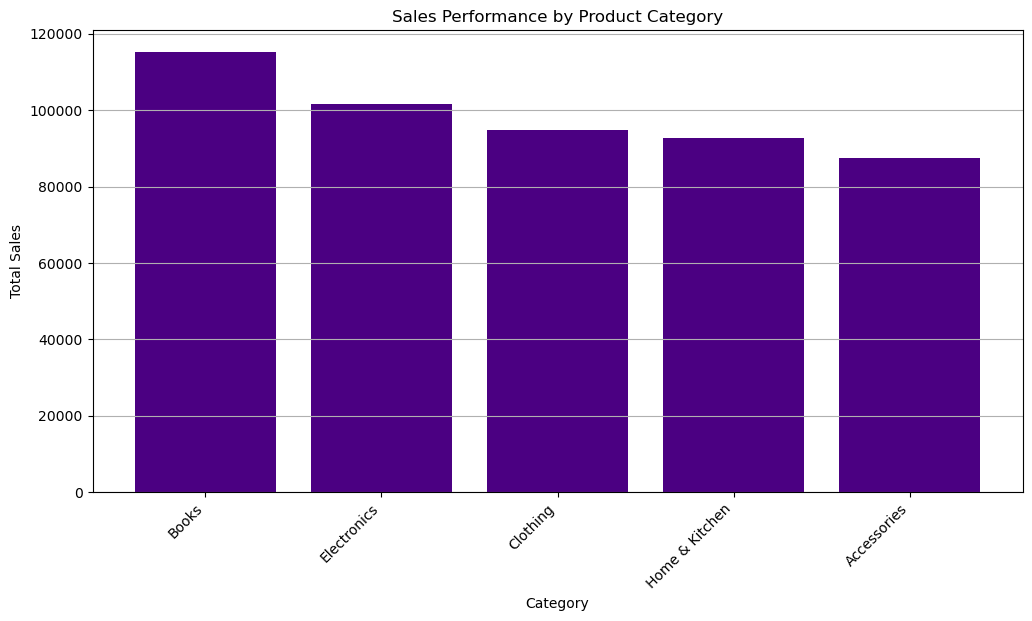

In [68]:
# Plot sales by category
plt.figure(figsize=(12, 6))
plt.bar(category_sales['Category'], category_sales['Total Sales'], color='indigo')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Product Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

#### Identifying the regions with the highest sales

In [70]:
# Calculating total sales by region
region_sales = df.groupby('Region')['Total Amount'].sum().reset_index()
region_sales

,Region,Total Amount
0,East,140332.35
1,North,116418.31
2,South,128528.63
3,West,106019.21


In [71]:
# Renaming columns for clarity
region_sales.columns = ['Region', 'Total Sales']
region_sales

,Region,Total Sales
0,East,140332.35
1,North,116418.31
2,South,128528.63
3,West,106019.21


In [72]:
# Sort regions by total sales in descending order
region_sales = region_sales.sort_values(by='Total Sales', ascending=False)
region_sales

,Region,Total Sales
0,East,140332.35
2,South,128528.63
1,North,116418.31
3,West,106019.21


In [73]:
region_sales

,Region,Total Sales
0,East,140332.35
2,South,128528.63
1,North,116418.31
3,West,106019.21


### Visualization of the Sales according to Region in Pie Chart

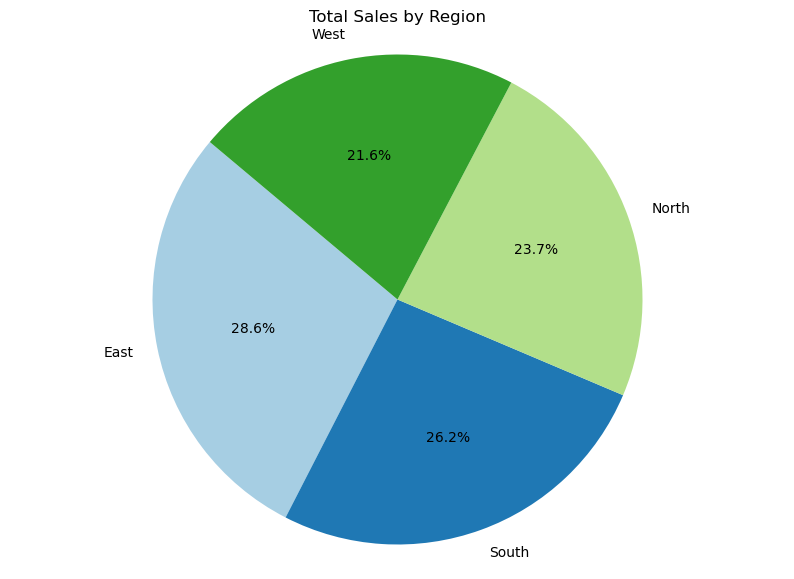

In [75]:
# Creating a pie chart
plt.figure(figsize=(10, 7))  # Optional: Adjust figure size
plt.pie(region_sales['Total Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(region_sales))))
plt.title('Total Sales by Region')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Showing the pie chart
plt.show()